# Capstone 3: Predicting Hotel Booking Cancellations - Preprocessing and Modeling 

For the modeling part of the project, I will find best model to predict hotel booking cancellations based on rest of the features found in the dataset. The goal of this notebook is to avoid overfitting and find the model that has the highest accuracy. Below are the two objectives I will be doing:

Preprocessing Objectives:

1. Handling missing values
2. Handling features
3. Correlations
4. Other arrangements before model comparisons

Modeling List:

1. Logistic Regression
2. KNeighbors Classifier
3. Decision Trees
4. Random Forest
5. AdaBoost Classifier
6. Gradient Boosting Classifier
7. XGBoost Classifier

Installing and importing necessary tools for preprocessing and model processes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 549.5 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 524.6 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.metrics import roc_curve, auc

Loading the data from previous step:

In [6]:
df2 = pd.read_csv('df2')

In [7]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Correlations
Taking a look at a heatmap for feature correlation:

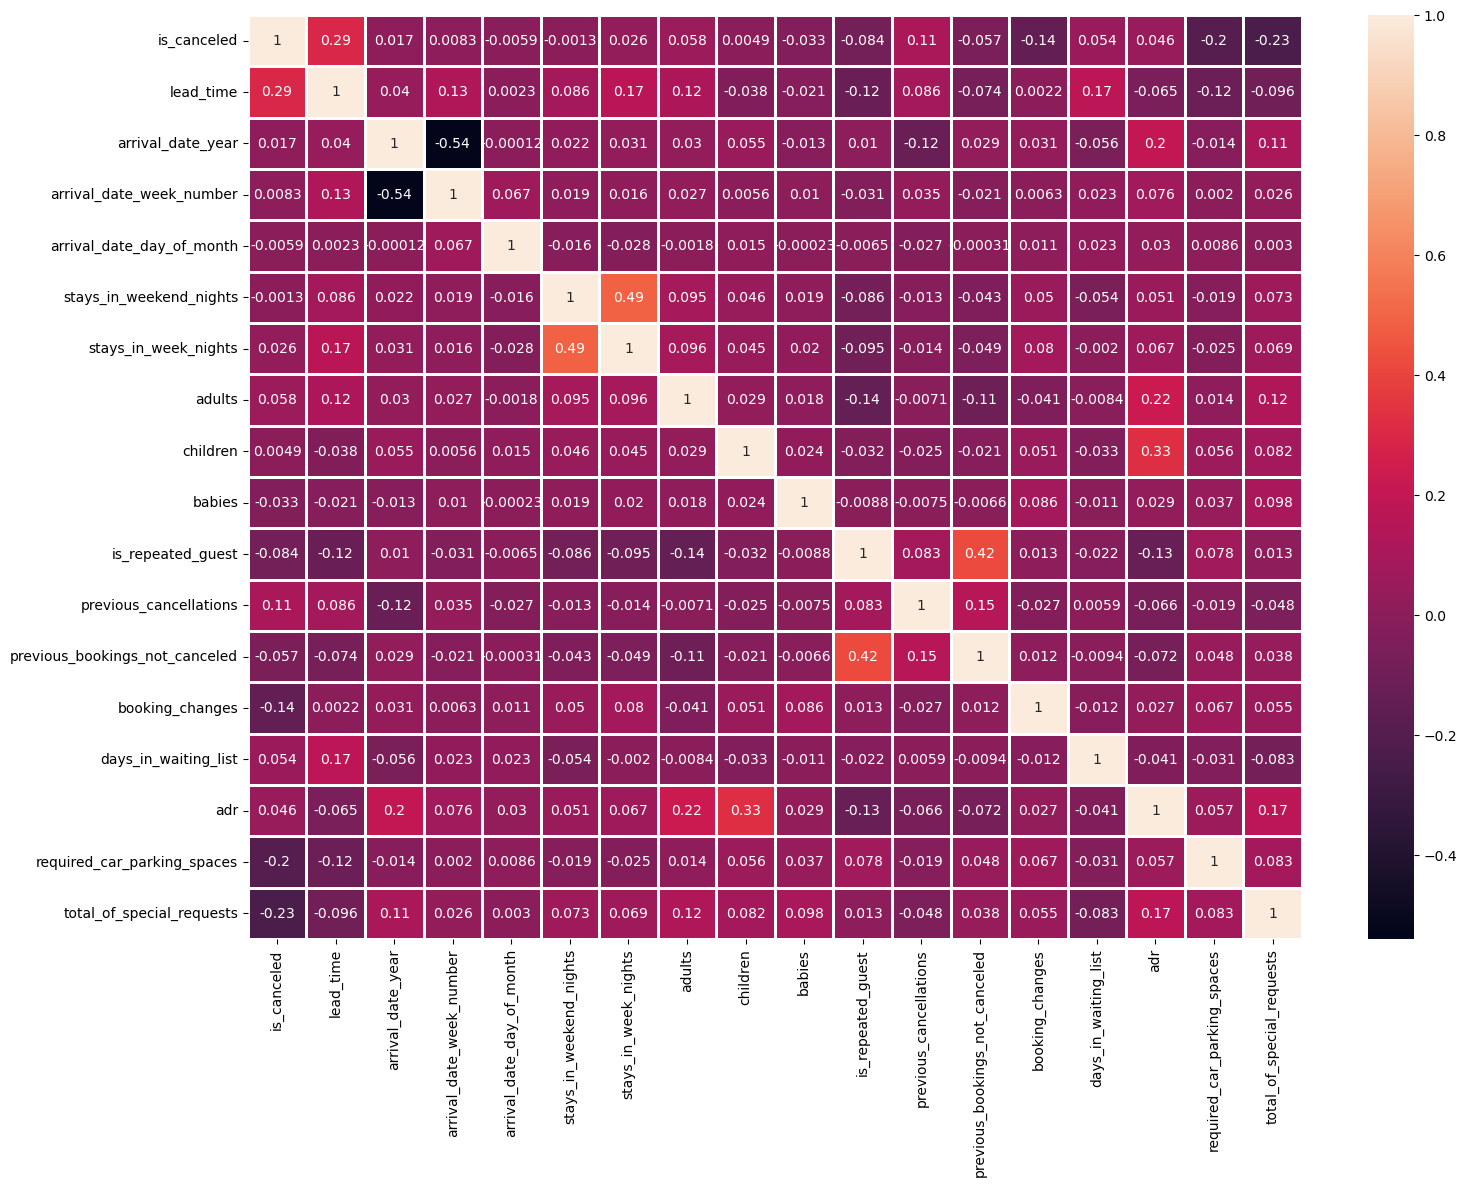

In [8]:
plt.figure(figsize=(17,12))

corr = df2.corr()
sns.heatmap(corr, annot=True, linewidths=1)

plt.show()

In [9]:
cancel_corr = df2.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004862
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

Looking at te heatmap with a more distinct outline of high correlations of variables with cancellations, it seems the lead_time is the most important feature.

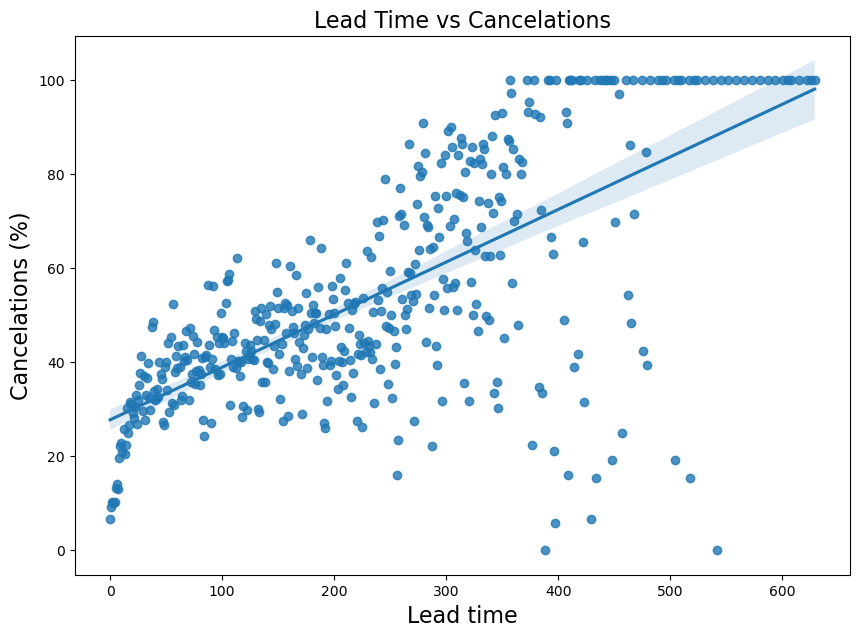

In [82]:
lead_cancel_data = df2.groupby("lead_time")["is_canceled"].describe()

lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

plt.figure(figsize=(10, 7))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Lead Time vs Cancelations", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations (%)", fontsize=16)
plt.savefig('Cancellations vs Lead Time.png')
plt.show()

Looking at the graph, bookings made a few days before their arrival date is rarely cancelled. On the otherhand, bookings made lets say a year in advance have a high probability of cancellations.

In [11]:
correlation = df2.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004862
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [12]:
df2.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Filling in the null values for children.

In [13]:
median_children = df2['children'].median()
median_children

0.0

In [14]:
df2['children'].fillna(median_children, inplace=True)

In [15]:
df2.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

There are no null values anymore, but we will need to see what kind of data types we are dealing with to touch on potential categorical variables. 

In [16]:
df2.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

# Categorical Variable Adjustments

We will see a list of categorical variables in order to decide which categorical variables we will be changing into numerical values.

In [17]:
category_cols = [col for col in df2.columns if df2[col].dtype == 'O']
category_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

12 Categorical Variables:

In [18]:
df2[category_cols].head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [19]:
category_df2 = df2[category_cols] 

In [20]:
category_df2

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119206,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119207,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119208,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [21]:
category_df2['reservation_status_date'] = pd.to_datetime(category_df2['reservation_status_date'])

category_df2.loc[:, 'year'] = category_df2['reservation_status_date'].dt.year
category_df2.loc[:, 'month'] = category_df2['reservation_status_date'].dt.month
category_df2.loc[:, 'day'] = category_df2['reservation_status_date'].dt.day

The code snippet above processes the 'reservation_status_date' column in the DataFrame to extract the year, month, and day components and adds them as separate columns ('year', 'month', 'day') to the DataFrame category_df2. This preprocessing step will be useful and help with the upcoming modeling tasks that require temporal features.

In [22]:
category_df2.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,2015,7,3


Checking out the categorical variables and its unique values:

In [23]:
for col in category_df2.columns:
    print(f"{col}: \n{category_df2[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'E

Dropping 'reservations_status_date' and 'arrival_date_month'

In [24]:
category_df2.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [25]:
category_df2.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,year,month,day
0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015,7,1
1,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015,7,1
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015,7,2
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015,7,2
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015,7,3


Now changing categorical variables to numerical values:

In [ ]:
category_df2.loc[:, 'hotel'] = category_df2['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

category_df2.loc[:, 'meal'] = category_df2['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

category_df2.loc[:, 'market_segment'] = category_df2['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

category_df2.loc[:, 'distribution_channel'] = category_df2['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

category_df2.loc[:, 'reserved_room_type'] = category_df2['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

category_df2.loc[:, 'deposit_type'] = category_df2['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

category_df2.loc[:, 'customer_type'] = category_df2['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

category_df2.loc[:, 'year'] = category_df2['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [27]:
category_df2.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,year,month,day
0,0,0,PRT,0,0,0,C,0,0,Check-Out,0,7,1
1,0,0,PRT,0,0,0,C,0,0,Check-Out,0,7,1
2,0,0,GBR,0,0,1,C,0,0,Check-Out,0,7,2
3,0,0,GBR,1,1,1,A,0,0,Check-Out,0,7,2
4,0,0,GBR,2,2,1,A,0,0,Check-Out,0,7,3


In [28]:
category_df2.isna().sum()

hotel                   0
meal                    0
country                 0
market_segment          0
distribution_channel    0
reserved_room_type      0
assigned_room_type      0
deposit_type            0
customer_type           0
reservation_status      0
year                    0
month                   0
day                     0
dtype: int64

In [29]:
for col in category_df2.columns:
    print(f"{col}: \n{category_df2[col].unique()}\n")

hotel: 
[0 1]

meal: 
[0 1 2 3 4]

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI'
 'NAM' 

We should take out the categorical variables that have not been changed into numerical values:

In [30]:
category_df2.drop(['reservation_status', 'assigned_room_type', 'country'], axis=1, inplace=True)


In [31]:
category_df2.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


Creating a numeric value dataframe by taking off the categorical variables:

In [32]:
numeric_df = df2.drop(columns = category_cols, axis = 1)
numeric_df.drop('is_canceled', axis = 1, inplace = True)
numeric_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119206,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119207,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119208,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [33]:
numeric_df.drop(['booking_changes', 'days_in_waiting_list'], axis=1, inplace=True)

We can see the categorical variables are dropped and only the numeric variables are in the numeric_df dataframe. 

From this dataframe, lets see the variances for the certain variables:

In [34]:
numeric_df.var()

lead_time                         11422.361808
arrival_date_year                     0.500535
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

We should normalize some of these values by scaling these values into certain ranges. Normalization is often performed to ensure that all features have the same scale and to prevent certain features from dominating others in models that are sensitive to the scale of the variables. That is why we are scaling the variables for 'lead_time' 'arrival_date_week_number' 'arrival_date_day_month' 'days_in_waiting_list' and 'adr'

In [35]:
numeric_df['lead_time'] = np.log(numeric_df['lead_time']+1)
numeric_df['arrival_date_week_number'] = np.log(numeric_df['arrival_date_week_number']+1)
numeric_df['arrival_date_day_of_month'] = np.log(numeric_df['arrival_date_day_of_month']+1)
numeric_df['adr'] = np.log(numeric_df['adr']+1)

In [36]:
numeric_df.var()

lead_time                         2.582757
arrival_date_year                 0.500535
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [37]:
numeric_df.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
1,6.603944,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
2,2.079442,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
3,2.639057,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
4,2.708050,2015,3.332205,0.693147,0,2,2,0.0,0,0,0,0,4.595120,0,1


Forgot to take out the arrical_date_year, so will drop that for the numeric_df dataframe.

In [38]:
numeric_df.drop(['arrival_date_year'], axis=1, inplace=True)

In [39]:
numeric_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,4.595120,0,1


In [40]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119206,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119207,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119208,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [41]:
numeric_df.isna().sum()

lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

There is one missing value in the numeric_df dataframe, so we will fill in a median value.

In [42]:
numeric_df[numeric_df['adr'].isna()]

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
14962,5.278115,2.397895,1.791759,4,6,2,0.0,0,1,0,2,NaN,0,0


In [43]:
median_adr = numeric_df['adr'].median()

numeric_df['adr'].fillna(median_adr, inplace=True)

numeric_df.isna().sum()

lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

# Setting up X and y

In [44]:
X = pd.concat([category_df2, numeric_df], axis = 1)
y = df2['is_canceled']

In [45]:
X.shape, y.shape

((119210, 24), (119210,))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [47]:
X_train.isna().sum()

hotel                             0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [48]:
y_train.head()

27326     0
10494     1
16036     1
113990    0
62249     1
Name: is_canceled, dtype: int64

In [49]:
X_train.shape, y_train.shape

((83447, 24), (83447,))

# Modeling
We will also see the ROC Curve to determine the summarizing classifier performance over a range of trade-offs between true positive (TP) and false positive (FP) error rates.

Along with the precision, recall, f1-scores, I will present the confusion matrixes for each model.

Here is a quick overview of the confusion matrix:

In the context of a confusion matrix for predicting hotel cancellations using logistic regression, the terms TP, FP, FN, and TN stand for:

TP (True Positive): This refers to the number of instances where the model correctly predicted that a booking would be canceled.
FP (False Positive): This represents the number of instances where the model incorrectly predicted that a booking would be canceled when it actually wasn't canceled.
FN (False Negative): This indicates the number of instances where the model incorrectly predicted that a booking would not be canceled when it actually was canceled.
TN (True Negative): This signifies the number of instances where the model correctly predicted that a booking would not be canceled.

# Logistic Regression:

In [50]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy score for the Logistic Regression is:", accuracy_lr)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy score for the Logistic Regression is: 0.8107261695047955
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22434
           1       0.87      0.58      0.69     13329

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763

Confusion Matrix:
[[21294  1140]
 [ 5629  7700]]


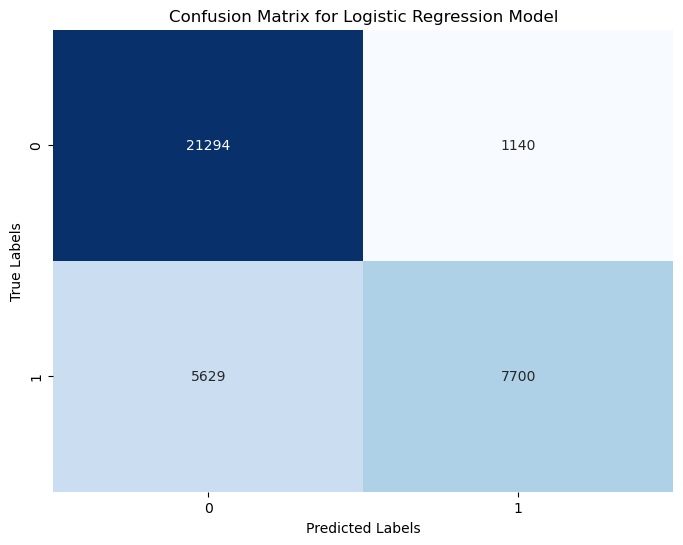

In [83]:
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.savefig('lr_confusionmatrix.png')
plt.show()

TP: 21294 means that the model correctly predicted 21,294 instances of canceled bookings.
FP: 5629 means that the model incorrectly predicted 5,629 instances of canceled bookings when they were not actually canceled.
FN: 1140 means that the model incorrectly predicted 1,140 instances of non-canceled bookings when they were actually canceled.
TN: 7700 means that the model correctly predicted 7,700 instances of non-canceled bookings.

In [51]:
logr_cv_scores = cross_val_score(logistic_regression_model, X_train, y_train, cv=8, scoring='accuracy')

print('Mean Score of CV:', logr_cv_scores.mean())

Mean Score of CV: 0.8117726882210845


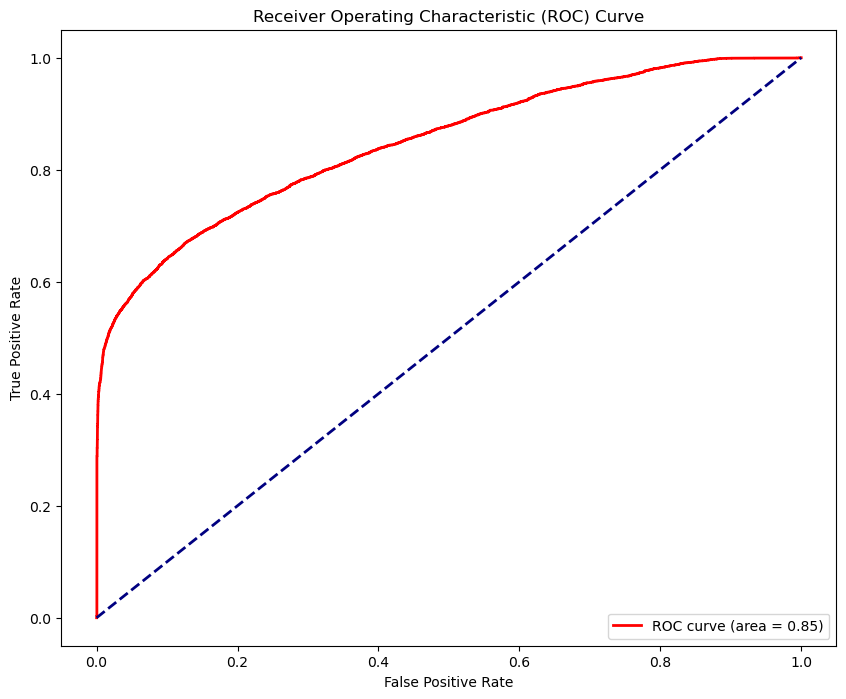

In [52]:
y_prob_lr = logistic_regression_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC of 0.85 means that the model has an 85% probability of correctly distinguishing between the positive and negative classes.
This shows that the model has a strong discriminatory power and is able to effectively distinguish between the positive and negative classes in the dataset.

# KNeighbors Classifier
Converting the data to NumPy arrays is a precautionary step to ensure compatibility with scikit-learn models.

This scikit learning model generall expects input data in Numpy array:

In [84]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

kneighbors_classifier_model = KNeighborsClassifier()
kneighbors_classifier_model.fit(X_train, y_train)

y_pred_knc_model = kneighbors_classifier_model.predict(X_test)

accuracy_knc = accuracy_score(y_test, y_pred_knc_model)
conf_m = confusion_matrix(y_test, y_pred_knc_model)
clf_report = classification_report(y_test, y_pred_knc_model)

print(f"Accuracy Score for the KNeighbors Classifier is : {accuracy_knc}")
print(f"Classification Report : \n{clf_report}")
print(f"Confusion Matrix : \n{conf_m}")

Accuracy Score for the KNeighbors Classifier is : 0.8950871011939714
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22434
           1       0.94      0.77      0.85     13329

    accuracy                           0.90     35763
   macro avg       0.91      0.87      0.88     35763
weighted avg       0.90      0.90      0.89     35763

Confusion Matrix : 
[[21781   653]
 [ 3099 10230]]


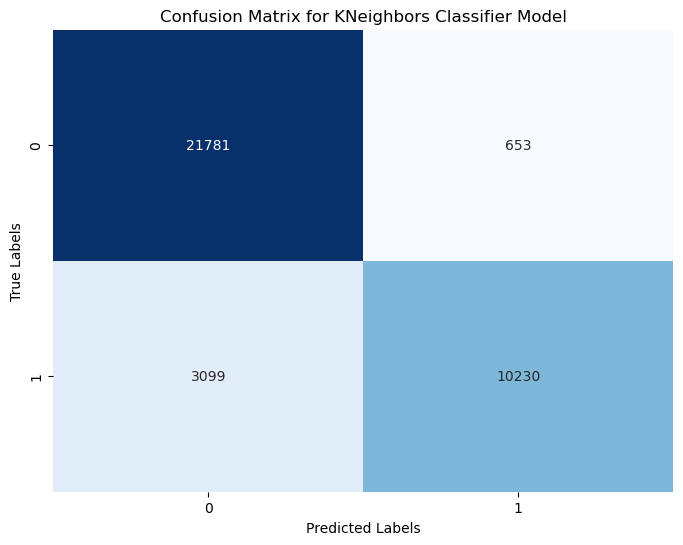

In [85]:
cm = confusion_matrix(y_test, y_pred_knc_model)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNeighbors Classifier Model')
plt.savefig('KNN_confusionmatrix.png')
plt.show()

In [54]:
knclass_cv_scores = cross_val_score(kneighbors_classifier_model, X_train, y_train, cv=5, scoring='accuracy')

print('Mean Score of CV:', knclass_cv_scores.mean())

Mean Score of CV: 0.8892949712214872


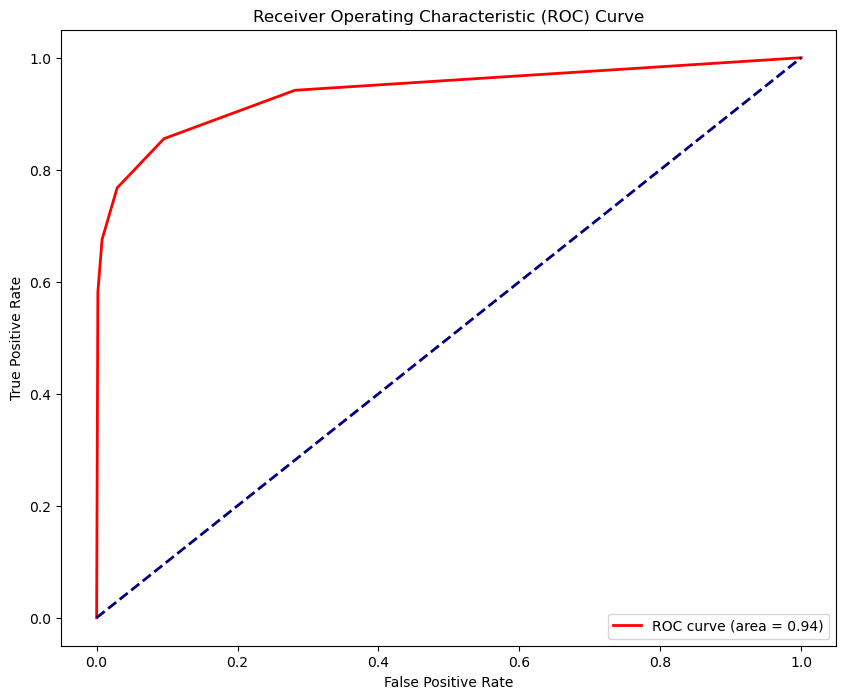

In [55]:
y_prob_knc = kneighbors_classifier_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_knc)

roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC of 0.92 means that the model has an 92% probability of correctly distinguishing between the positive and negative classes.
This shows that the model has a strong discriminatory power and is able to effectively distinguish between the positive and negative classes in the dataset.

# Decision Trees Classifier

In [56]:
decision_tree_classifier_model = DecisionTreeClassifier()
decision_tree_classifier_model.fit(X_train, y_train)

y_pred_dtc_model = decision_tree_classifier_model.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc_model)
conf_m = confusion_matrix(y_test, y_pred_dtc_model)
clf_report = classification_report(y_test, y_pred_dtc_model)

print(f"Accuracy Score for the Decision Tree is : {accuracy_dtc}")
print(f"Classification Report : \n{clf_report}")
print(f"Confusion Matrix : \n{conf_m}")

Accuracy Score for the Decision Tree is : 0.9489696054581551
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22434
           1       0.93      0.93      0.93     13329

    accuracy                           0.95     35763
   macro avg       0.95      0.94      0.95     35763
weighted avg       0.95      0.95      0.95     35763

Confusion Matrix : 
[[21557   877]
 [  948 12381]]


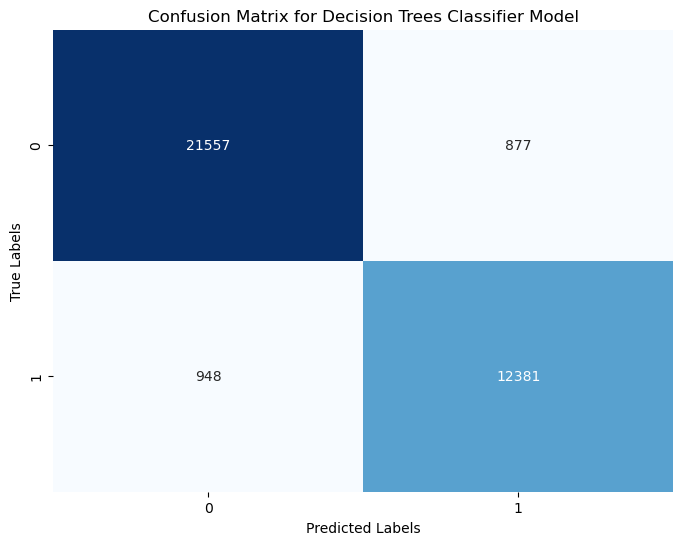

In [86]:
cm = confusion_matrix(y_test, y_pred_dtc_model)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Trees Classifier Model')
plt.savefig('dtc_confusionmatrix.png')
plt.show()

In [57]:
dtc_cv_scores = cross_val_score(decision_tree_classifier_model, X_train, y_train, cv=5, scoring='accuracy')

print('Mean Score of CV:', dtc_cv_scores.mean())

Mean Score of CV: 0.9469843588740279


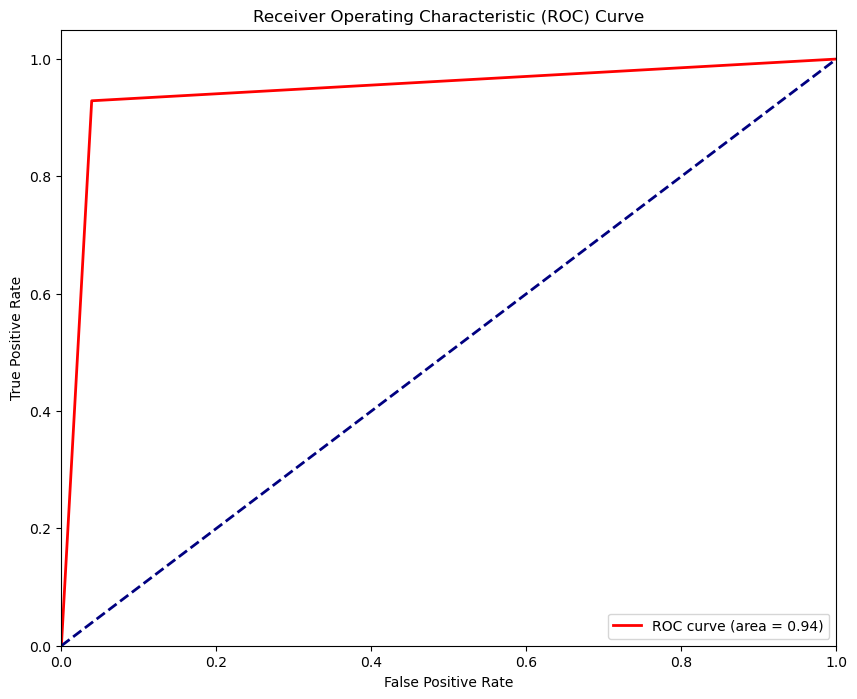

In [58]:
y_prob_dtc = decision_tree_classifier_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_dtc)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The decision tree classifier is able to correctly predict whether a hotel booking will be canceled or not around 54% of the time on average. This indicates that the model has some predictive power, but it may not be very strong.

Given the nature of hotel booking cancellations, where various factors such as booking time, customer demographics, hotel amenities, and external factors like seasonality or events can influence cancellations, achieving a 54% accuracy with a decision tree model suggests that some patterns are captured but not all. There may be room for improvement by considering more features or using more sophisticated models.

# Random Forest Classifier

In [59]:
random_forest_classifier_model = RandomForestClassifier()
random_forest_classifier_model.fit(X_train, y_train)

y_pred_rfc_model = random_forest_classifier_model.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc_model)
conf_m = confusion_matrix(y_test, y_pred_rfc_model)
clf_report = classification_report(y_test, y_pred_rfc_model)

print(f"Accuracy score for the Random Forest Classifier is: {accuracy_rfc}")
print(f"Classification Report: \n{clf_report}")
print(f"Confusion Matrix: \n{conf_m}")

Accuracy score for the Random Forest Classifier is: 0.9538629309621676
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22434
           1       0.99      0.89      0.93     13329

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763

Confusion Matrix: 
[[22263   171]
 [ 1479 11850]]


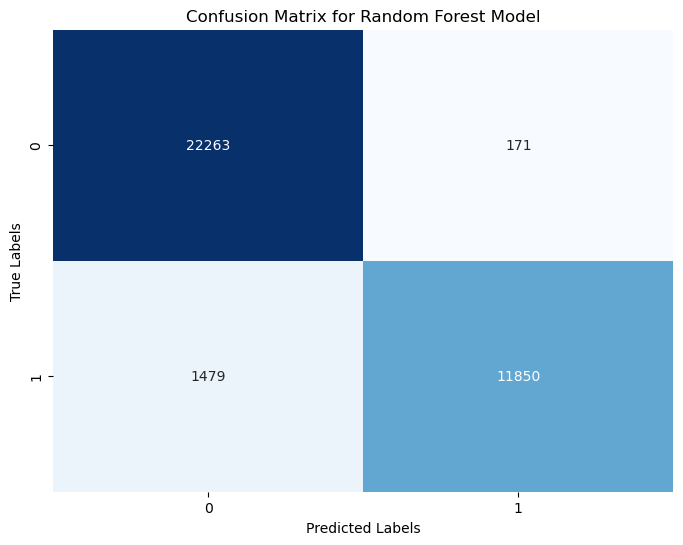

In [87]:
cm = confusion_matrix(y_test, y_pred_rfc_model)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('rfc_confusionmatrix.png')
plt.show()

In [60]:
rfc_cv_scores = cross_val_score(random_forest_classifier_model, X_train, y_train, cv=5, scoring='accuracy')

print('Mean Score of CV:', rfc_cv_scores.mean())

Mean Score of CV: 0.9502318813700367


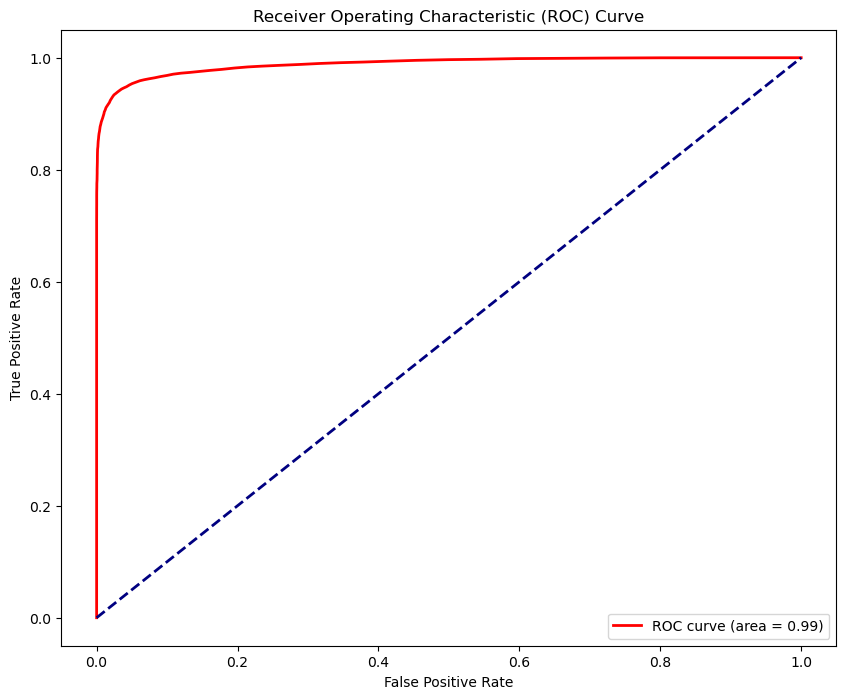

In [61]:
y_prob_rfc = random_forest_classifier_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rfc)

roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Both the high accuracy score (0.95) and the high ROC AUC score (0.99) suggest that the Random Forest Classifier is a promising model for predicting hotel booking cancellations, providing valuable insights and opportunities for optimizing hotel operations and enhancing customer experience.

Lets take a look at a feature importance analysis utilizing the random forest classfier with a bar graph:

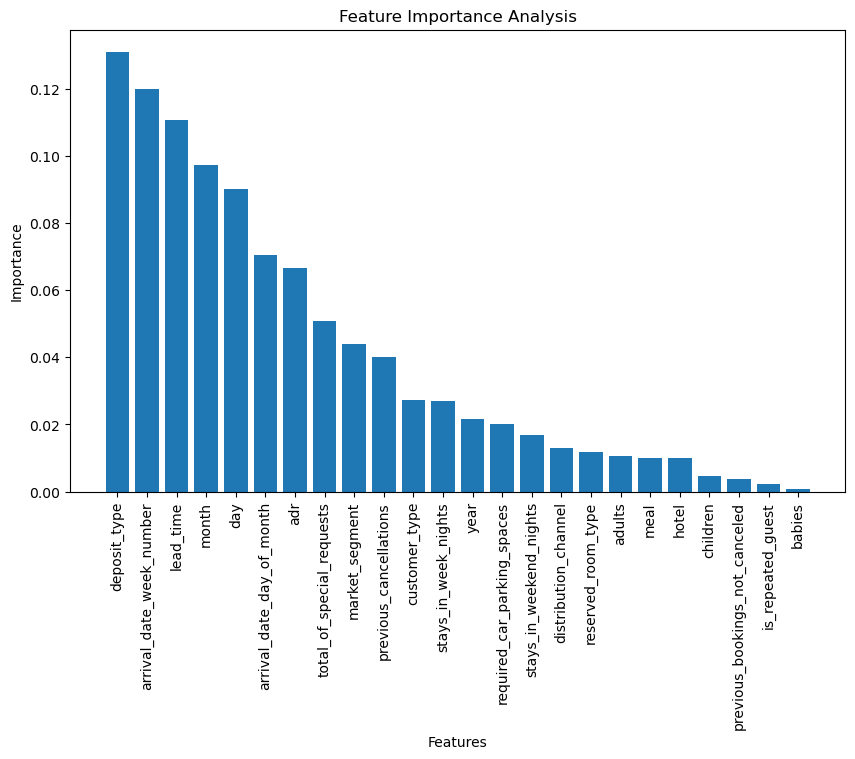

In [62]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X, y)

# Getting feature importances
feature_importances = rf_classifier.feature_importances_

feature_names = X.columns

sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis')
plt.show()

Deposit type and lead time seem to show importances when it comes to predicting cancellations.

# AdaBoost Classifier 

In [68]:
ada_boost_classifier_model = AdaBoostClassifier(base_estimator=decision_tree_classifier_model)
ada_boost_classifier_model.fit(X_train, y_train)

y_pred_abc_model = ada_boost_classifier_model.predict(X_test)

accuracy_abc = accuracy_score(y_test, y_pred_abc_model)
conf_m = confusion_matrix(y_test, y_pred_abc_model)
clf_report = classification_report(y_test, y_pred_abc_model)

print(f"Accuracy score for the AdaBoost Classifier is: {accuracy_abc}")
print(f"Confusion Matrix: \n{conf_m}")
print(f"Classification Report: \n{clf_report}")

Accuracy score for the AdaBoost Classifier is: 0.9490534910382239
Confusion Matrix: 
[[21554   880]
 [  942 12387]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22434
           1       0.93      0.93      0.93     13329

    accuracy                           0.95     35763
   macro avg       0.95      0.95      0.95     35763
weighted avg       0.95      0.95      0.95     35763



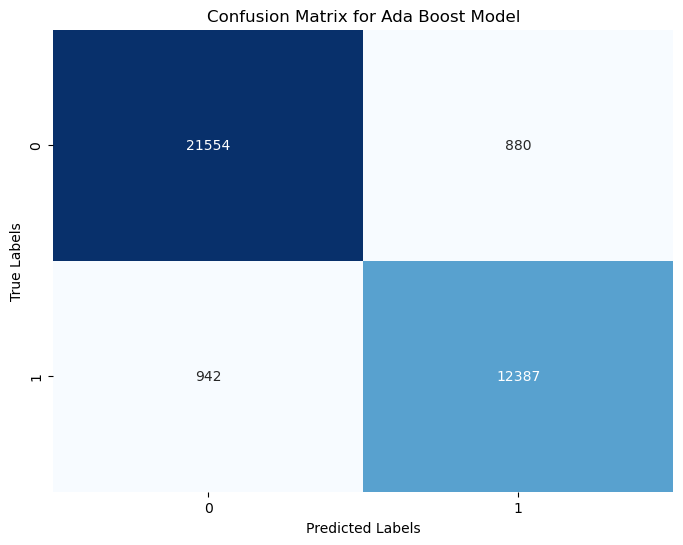

In [88]:
cm = confusion_matrix(y_test, y_pred_abc_model)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Ada Boost Model')
plt.savefig('abc_confusionmatrix.png')
plt.show()

In [175]:
abc_cv_scores = cross_val_score(ada_boost_classifier_model, X_train, y_train, cv=5, scoring='accuracy')

print('Mean Score of CV:', abc_cv_scores.mean())

Mean Score of CV: 0.9491294298354405


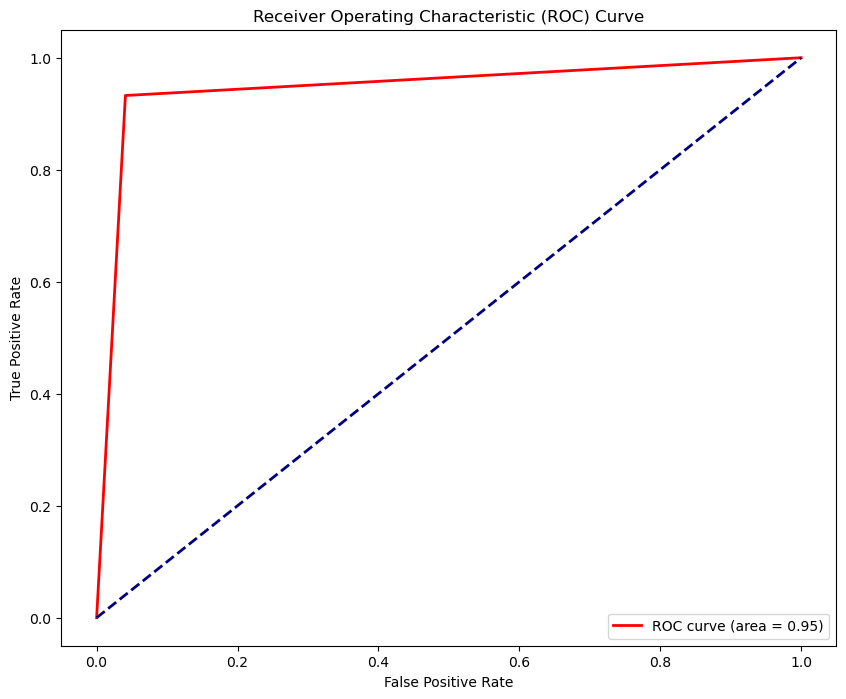

In [154]:
y_prob_abc = ada_boost_classifier_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_abc)

roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Model Complexity: The AdaBoost classifier may be too simple or underfitting the data, it might not capture the underlying patterns necessary to generate a meaningful ROC curve.

An AdaBoost classifier is a technique that enhances the performance of a base classifier by sequentially training multiple copies of it on the same dataset. However, during each iteration, the weights of misclassified instances are adjusted to prioritize the correct classification of these instances in subsequent iterations. This iterative process helps the AdaBoost classifier to focus more on challenging cases and improve its overall accuracy.

The accuracy score indicate 0.94 and an ROC AUC of 0.95

# Gradient Boosting Classifier

In [71]:
gradient_boosting_classifier_model = GradientBoostingClassifier()
gradient_boosting_classifier_model.fit(X_train, y_train)

y_pred_gbc_model = gradient_boosting_classifier_model.predict(X_test)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc_model)
conf_m = confusion_matrix(y_test, y_pred_rfc_model)
clf_report = classification_report(y_test, y_pred_rfc_model)

print(f"Accuracy score for the Gradient Boosting Classifier is: {accuracy_gbc}")
print(f"Classification Report: \n{clf_report}")
print(f"Confusion Matrix: \n{conf_m}")

Accuracy score for the Gradient Boosting Classifier is: 0.9140452422895171
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22434
           1       0.99      0.89      0.93     13329

    accuracy                           0.95     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.95      0.95     35763

Confusion Matrix: 
[[22263   171]
 [ 1479 11850]]


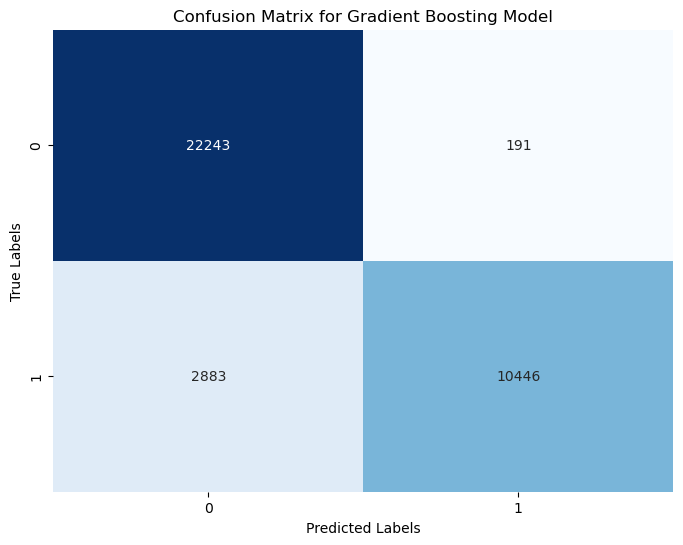

In [89]:
cm = confusion_matrix(y_test, y_pred_gbc_model)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.savefig('gb_confusionmatrix.png')
plt.show()

In [152]:
gbc_cv_scores = cross_val_score(gradient_boosting_classifier_model, X_train, y_train, cv=5, scoring='accuracy')

print('Mean Score of CV:', gbc_cv_scores.mean())

Mean Score of CV: 0.9193140834182136


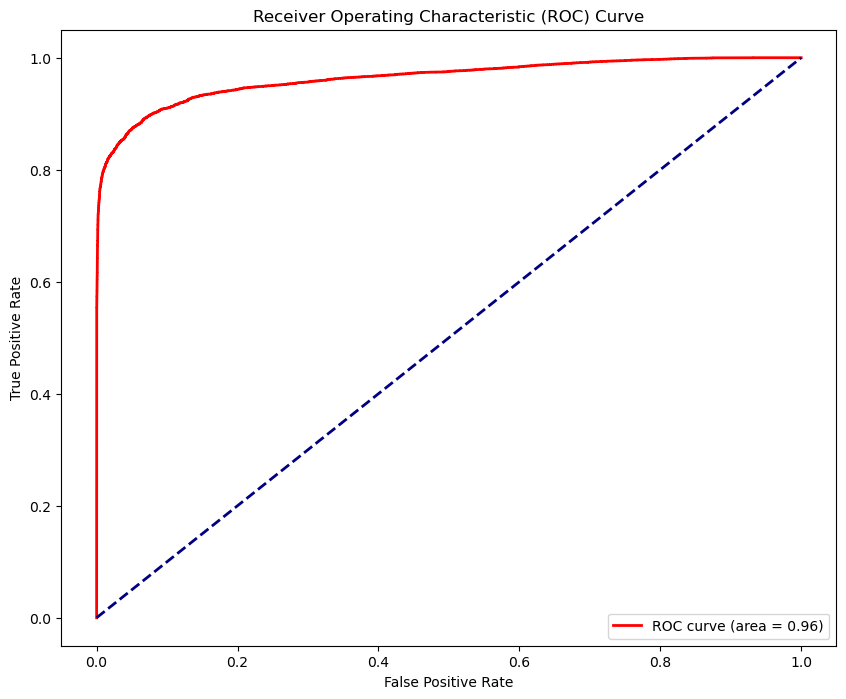

In [155]:
y_prob_gbc = gradient_boosting_classifier_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_gbc)

roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC of 0.96 means that the model has an 96% probability of correctly distinguishing between the positive and negative classes.
The accuracy score here is 0.91

# XGBoost Classifier
With Hyperparameters:

booster: This parameter specifies the type of booster to use. In this case, it's set to 'gbtree', which means gradient boosted trees.

learning_rate: This parameter controls the step size at each iteration while moving toward a minimum of the loss function. A lower learning rate generally makes the model more robust but requires more iterations to converge. Here, it's set to 0.1.

max_depth: This parameter controls the maximum depth of the individual trees. A higher value can make the model more expressive but can also lead to overfitting. Here, it's set to 5.

n_estimators: This parameter specifies the number of trees to fit. Increasing this parameter generally improves performance at the expense of increased computational cost. Here, it's set to 180

In [73]:
xgboost_classifier_model = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgboost_classifier_model.fit(X_train, y_train)

y_pred_xgb_model = xgboost_classifier_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb_model)
conf_m = confusion_matrix(y_test, y_pred_xgb_model)
clf_report = classification_report(y_test, y_pred_xgb_model)

print(f"Accuracy score for the XGBoost Classifier is: {accuracy_xgb}")
print(f"Classification Report: \n{clf_report}")
print(f"Confusion Matrix: \n{conf_m}")

Accuracy score for the XGBoost Classifier is: 0.9820484858652797
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22434
           1       1.00      0.95      0.98     13329

    accuracy                           0.98     35763
   macro avg       0.99      0.98      0.98     35763
weighted avg       0.98      0.98      0.98     35763

Confusion Matrix: 
[[22419    15]
 [  627 12702]]


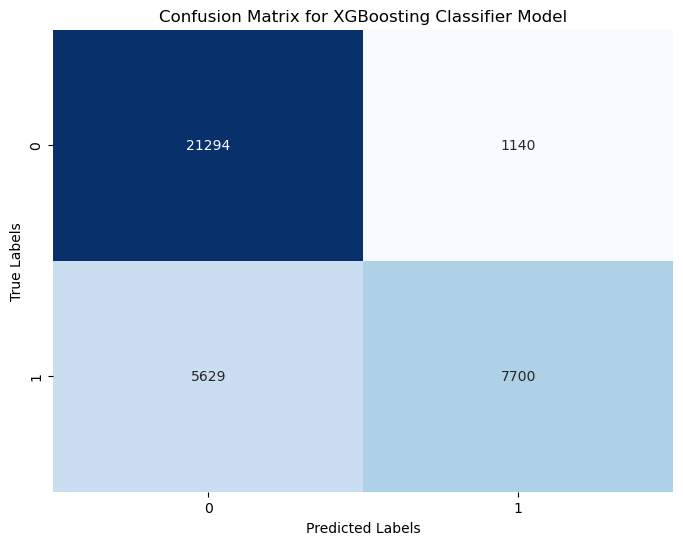

In [90]:
cm = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoosting Classifier Model')
plt.savefig('xgboost_confusionmatrix.png')
plt.show()

In [153]:
xgb_cv_scores = cross_val_score(xgboost_classifier_model, X_train, y_train, cv=5, scoring='accuracy')

print('Mean Score of CV:', xgb_cv_scores.mean())

Mean Score of CV: 0.9834266274923179


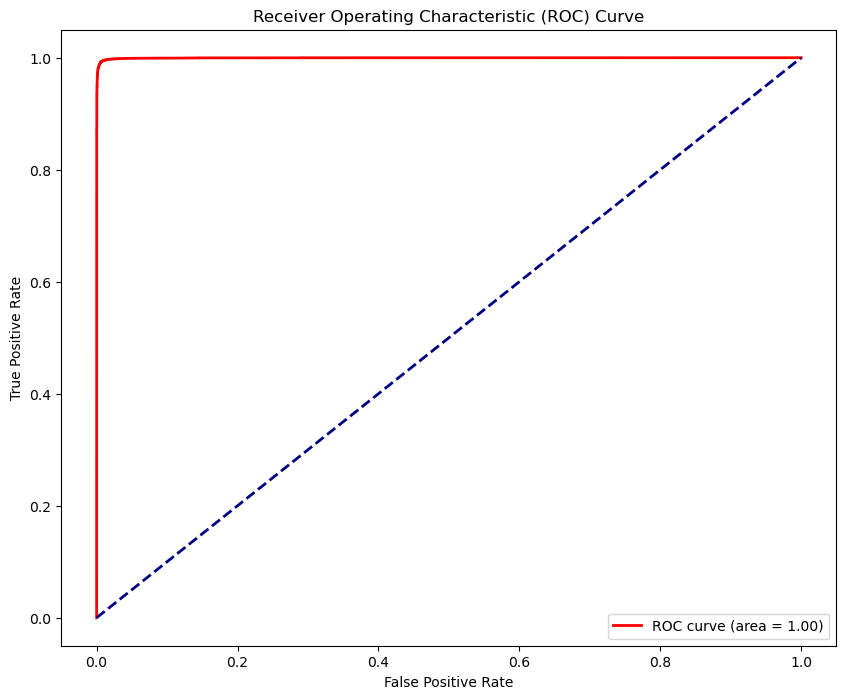

In [156]:
y_prob_xgb = xgboost_classifier_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The accuracy score for the xgboost classifier is at 0.98
It's important to note that while an ROC AUC of 1.00 represents perfect performance, it does not necessarily mean the model is optimal or without flaws. We have to consider the context of the data, potential biases, and the model's generalization ability when interpreting performance metrics. 

# Comparing Models

In [195]:
model_comparison = pd.DataFrame({'Model' : ['Logistic Regression', 'KNeighbors Classifier', 'Decision Trees',
                                           'Random Forests', 'Ada Boost', 'Gradient Boost', 'XGBoost'],
                                'Scores' : accuracy_scores})
model_comparison_sorted = model_comparison.sort_values(by='Scores', ascending=False)

model_comparison_sorted.reset_index(drop=True, inplace=True)
model_comparison_sorted.index += 1

print(model_comparison_sorted)

                   Model    Scores
1                XGBoost  0.982831
2         Random Forests  0.957442
3         Decision Trees  0.950004
4              Ada Boost  0.949333
5         Gradient Boost  0.917513
6  KNeighbors Classifier  0.865140
7    Logistic Regression  0.804183


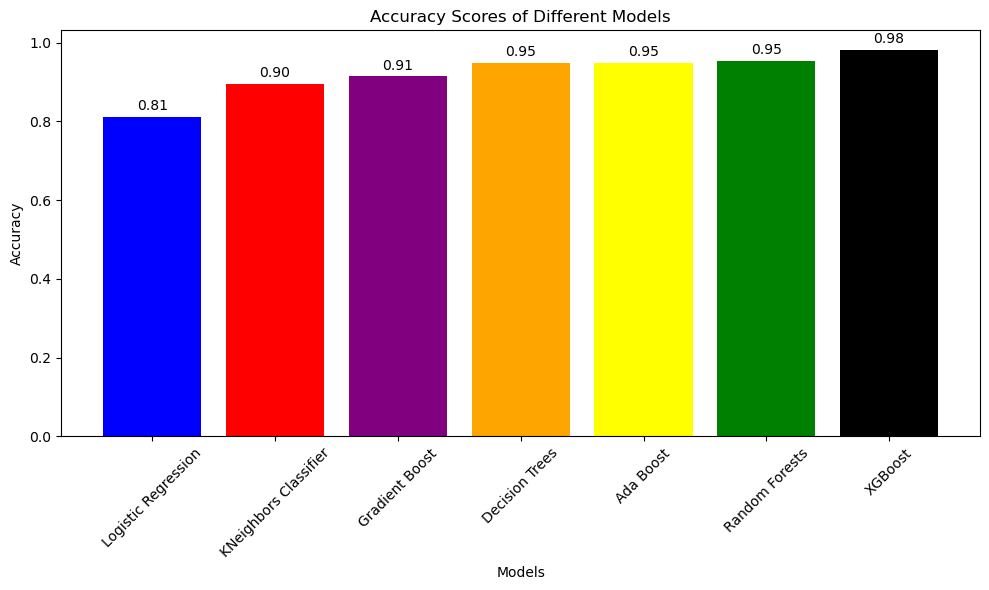

In [92]:
models = ['Logistic Regression', 'KNeighbors Classifier', 'Decision Trees', 'Random Forests', 'Ada Boost', 'Gradient Boost', 'XGBoost']
accuracy_scores = [accuracy_lr, accuracy_knc, accuracy_dtc, accuracy_rfc, accuracy_abc, accuracy_gbc, accuracy_xgb]
colors = ['blue', 'red', 'orange', 'green', 'yellow', 'purple', 'black']

sorted_data = sorted(zip(models, accuracy_scores, colors), key=lambda x: x[1])
sorted_models, sorted_accuracy_scores, sorted_colors = zip(*sorted_data)

plt.figure(figsize=(10, 6))

bars = plt.bar(sorted_models, sorted_accuracy_scores, color=sorted_colors)

for bar, score in zip(bars, sorted_accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.savefig('ModelComparisons.png')
plt.show()

Comparing models, XGboost has the best accuracy score, although it would be good to tune the other high accuracy scores of over 0.9